In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.image import central_crop, pad_to_bounding_box, resize
from tensorflow.keras.models import Model

In [55]:
train_datagen = ImageDataGenerator(rescale = 1.0/255)
train_datagen_re = ImageDataGenerator(rescale = 1.0/255,
                                rotation_range=40,
                                #shear_range=30,
                                brightness_range=(0.3, 2.0),
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                zoom_range=0.5,
                                horizontal_flip=True,
                                #fill_mode='constant'
                                  )
validataion_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [56]:
img = load_img('test_img/Manneken Pis.jpg')
img_array = img_to_array(img) / 255
img = np.array(resize(img_array, (360, 360)))

In [57]:
#classes_li = list(df['en관광지'][:10].values)
target_size = (360, 360)
batch_size = 30
train_generator = train_datagen.flow_from_directory('country_img_gen/train', target_size = target_size, batch_size = batch_size)
train_generator_re = train_datagen_re.flow_from_directory('country_img_gen/train', target_size = target_size, batch_size = batch_size)


Found 17871 images belonging to 13 classes.
Found 17871 images belonging to 13 classes.


In [58]:
x_data, y_data = train_generator.next()
x_data_re, y_data_re = train_generator_re.next()

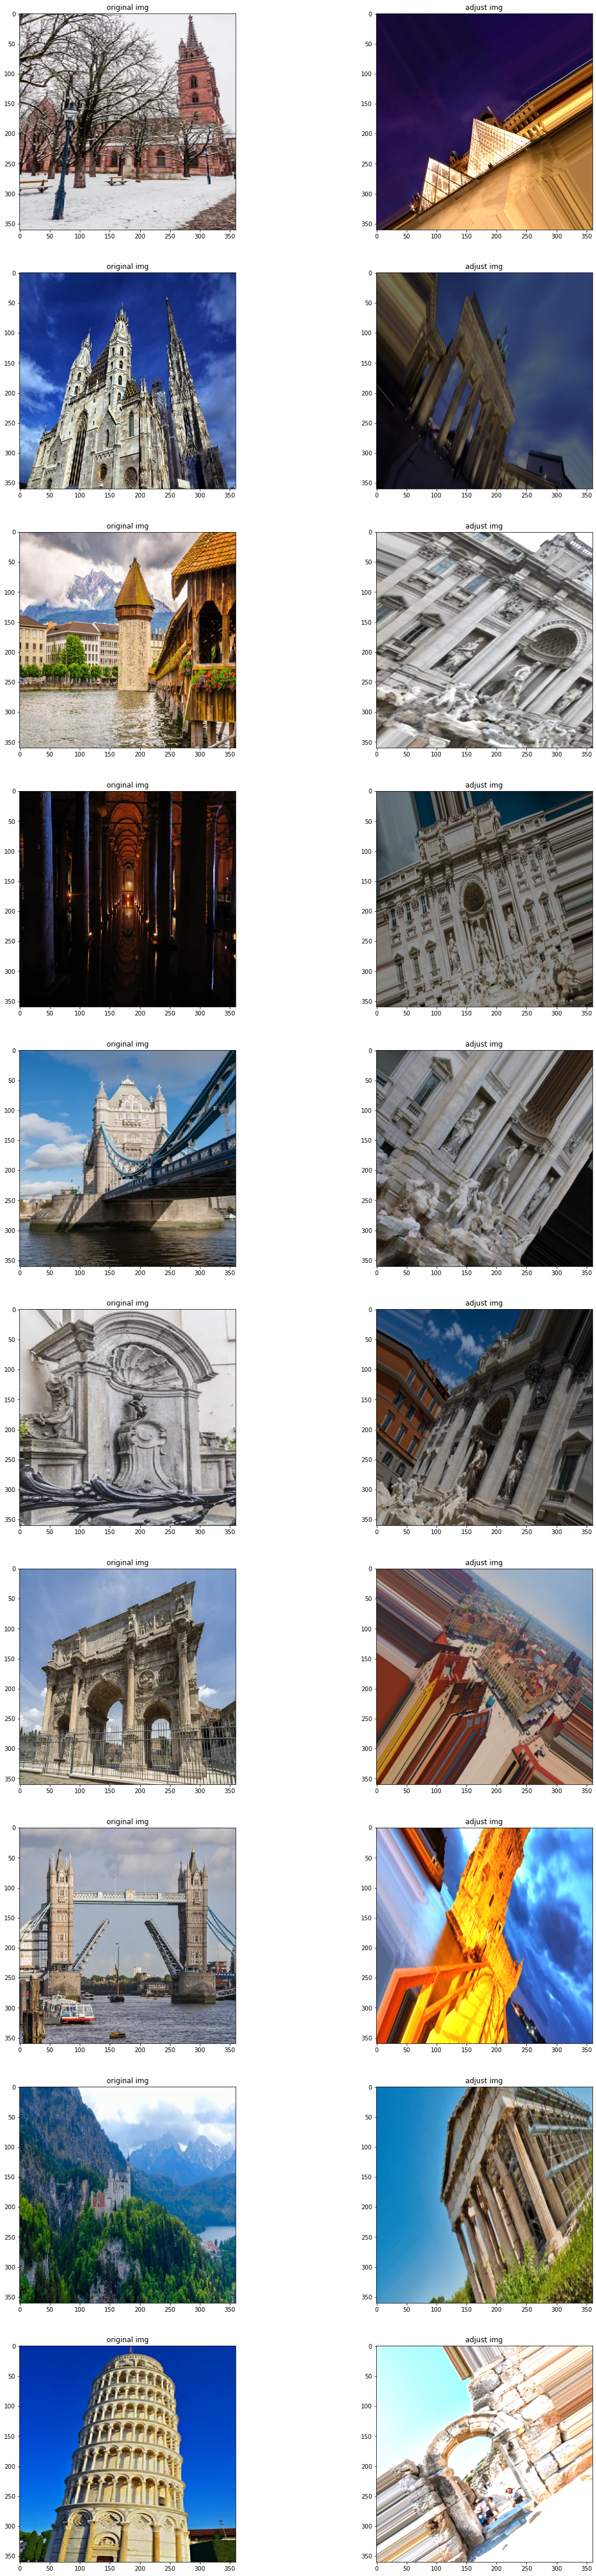

In [59]:
fig ,axes = plt.subplots(10, 2, figsize=(20,80))

count = 0
for i in range(10):
    for j in range(2):
        if j == 0:
            axes[i][j].set_title('original img')
            axes[i][j].imshow(x_data[count])
            
        elif j == 1:
            axes[i][j].set_title('adjust img')
            axes[i][j].imshow(x_data_re[count])
        count += 1
            